In [1]:
# 한글형태소 분석기
from konlpy.tag import Okt, Kkma
okt = Okt()
kkma = Kkma()

In [2]:
# 형태소별로 분류
okt.morphs('아버지가방에들어가신다')

['아버지', '가방', '에', '들어가신다']

In [3]:
kkma.morphs('아버지가방에들어가신다')

['아버지', '가방', '에', '들어가', '시', 'ㄴ다']

In [4]:
# 어떤 형태소인지 분류 및 매핑
text='아버지가방에들어가신다'
okt.pos(text)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [5]:
kkma.pos(text)

[('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]

In [6]:
# 분류할 수 있는 형태소들을 나열
okt.tagset,kkma.tagset

({'Adjective': '형용사',
  'Adverb': '부사',
  'Alpha': '알파벳',
  'Conjunction': '접속사',
  'Determiner': '관형사',
  'Eomi': '어미',
  'Exclamation': '감탄사',
  'Foreign': '외국어, 한자 및 기타기호',
  'Hashtag': '트위터 해쉬태그',
  'Josa': '조사',
  'KoreanParticle': '(ex: ㅋㅋ)',
  'Noun': '명사',
  'Number': '숫자',
  'PreEomi': '선어말어미',
  'Punctuation': '구두점',
  'ScreenName': '트위터 아이디',
  'Suffix': '접미사',
  'Unknown': '미등록어',
  'Verb': '동사'},
 {'EC': '연결 어미',
  'ECD': '의존적 연결 어미',
  'ECE': '대등 연결 어미',
  'ECS': '보조적 연결 어미',
  'EF': '종결 어미',
  'EFA': '청유형 종결 어미',
  'EFI': '감탄형 종결 어미',
  'EFN': '평서형 종결 어미',
  'EFO': '명령형 종결 어미',
  'EFQ': '의문형 종결 어미',
  'EFR': '존칭형 종결 어미',
  'EP': '선어말 어미',
  'EPH': '존칭 선어말 어미',
  'EPP': '공손 선어말 어미',
  'EPT': '시제 선어말 어미',
  'ET': '전성 어미',
  'ETD': '관형형 전성 어미',
  'ETN': '명사형 전성 어미',
  'IC': '감탄사',
  'JC': '접속 조사',
  'JK': '조사',
  'JKC': '보격 조사',
  'JKG': '관형격 조사',
  'JKI': '호격 조사',
  'JKM': '부사격 조사',
  'JKO': '목적격 조사',
  'JKQ': '인용격 조사',
  'JKS': '주격 조사',
  'JX': '보조사',
  'MA': '부사',
  'MAC

In [7]:
# 명사만 추출
okt.nouns(text)

['아버지', '가방']

In [8]:
# countvectorizer와 연결해서 사용하기(BOW)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [9]:
text = ['동해물과 백두산이 마르고 닳도록','하느님이 보우하사 우리나라 만세','무궁화 삼천리 화려강산','대한사람 대한으로 길이 보전하세']

In [10]:
# 토큰화 및 단어사전 구축
cv.fit(text) 

CountVectorizer()

In [11]:
# 띄어쓰기 단위로 토큰화
cv.vocabulary_

{'동해물과': 4,
 '백두산이': 8,
 '마르고': 5,
 '닳도록': 1,
 '하느님이': 13,
 '보우하사': 9,
 '우리나라': 12,
 '만세': 6,
 '무궁화': 7,
 '삼천리': 11,
 '화려강산': 14,
 '대한사람': 2,
 '대한으로': 3,
 '길이': 0,
 '보전하세': 10}

In [12]:
# 토큰화 방법 정의 함수
def mytoken(text):
    return okt.nouns(text)

In [13]:
cv_okt = CountVectorizer(tokenizer=mytoken)

In [14]:
cv_okt.fit(text)

C:\Users\smhrd\anaconda3\envs\test\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(tokenizer=<function mytoken at 0x000001D946C2E3A0>)

In [15]:
cv_okt.vocabulary_

{'해물': 14,
 '백두산': 6,
 '마르고': 3,
 '하느님': 12,
 '보우': 7,
 '하사': 13,
 '우리나라': 11,
 '만세': 4,
 '무궁화': 5,
 '삼천리': 10,
 '화려': 15,
 '강산': 0,
 '대한': 2,
 '사람': 9,
 '길이': 1,
 '보전': 8}

In [16]:
import pandas as pd

## 문제 정의
- 한글 영화 리뷰 데이터셋으로 감성분석을 진행
- kolnpy를 사용해서 형태소 분류

## 데이터 수집

In [17]:
text_train = pd.read_csv('./ratings_train.txt',delimiter ='\t')
text_test = pd.read_csv('./ratings_test.txt',delimiter ='\t')

In [18]:
text_train.shape,text_test.shape

((150000, 3), (50000, 3))

## 데이터 전처리

### 결측지 확인

In [19]:
text_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [20]:
text_train[pd.isnull(text_train['document'])]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


### 결측지 제거

In [21]:
text_train.dropna(inplace=True)
text_test.dropna(inplace=True)

In [22]:
text_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [23]:
X_train = text_train['document'][:10000]
y_train = text_train['label'][:10000]
X_test = text_test['document'][:1000]
y_test = text_test['label'][:1000]

### 토큰화

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tf_okt = TfidfVectorizer(tokenizer=mytoken)

In [26]:
cv_okt = CountVectorizer(tokenizer=mytoken)

In [27]:
tf_okt.fit(X_train)

C:\Users\smhrd\anaconda3\envs\test\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(tokenizer=<function mytoken at 0x000001D946C2E3A0>)

In [28]:
cv_okt.fit(X_train)

CountVectorizer(tokenizer=<function mytoken at 0x000001D946C2E3A0>)

In [29]:
len(tf_okt.vocabulary_)

10089

In [30]:
len(cv_okt.vocabulary_)

10089

### 수치화

In [31]:
X_train_okt2 = tf_okt.transform(X_train)
X_test_okt2 = tf_okt.transform(X_test)

In [32]:
X_train_okt = cv_okt.transform(X_train)
X_test_okt = cv_okt.transform(X_test)

In [33]:
X_train_okt2.shape

(10000, 10089)

In [34]:
X_train_okt.shape

(10000, 10089)

## 탐색적 데이터 분석

## 모델 선택 및 하이퍼 파라미터 튜닝

### 모델 선택

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr_model = LogisticRegression()

## 학습

In [37]:
lr_model.fit(X_train_okt2,y_train)

LogisticRegression()

In [38]:
lr_model.fit(X_train_okt,y_train)

C:\Users\smhrd\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 평가

In [39]:
lr_model.score(X_train_okt2,y_train)

0.8979

In [40]:
lr_model.score(X_train_okt,y_train)

0.882

In [41]:
lr_model.score(X_test_okt2,y_test)

0.721

In [42]:
lr_model.score(X_test_okt,y_test)

0.727

## 감성분석

In [43]:
voca = cv_okt.vocabulary_
world_weight = lr_model.coef_

In [44]:
df = pd.DataFrame([voca.keys(),voca.values()])
df = df.T
df_sorted = df.sort_values(by = 1)
df_sorted['coef'] = world_weight.reshape(-1)
df_sorted.sort_values(by = 'coef',inplace=True)
top30_df = pd.concat([df_sorted.head(30),df_sorted.tail(30)])
top30_df

,0,1,coef
418,최악,8449,-3.066925
168,쓰레기,5219,-2.572370
388,실망,5109,-2.181924
371,졸작,7744,-2.001891
1786,차라리,8225,-1.967331
1463,이하,6857,-1.942159
137,별로,3650,-1.860713
2057,접,7477,-1.860496
211,돈,2008,-1.810393
310,짜증,8146,-1.802943


In [45]:
import matplotlib.pyplot as plt
import matplotlib

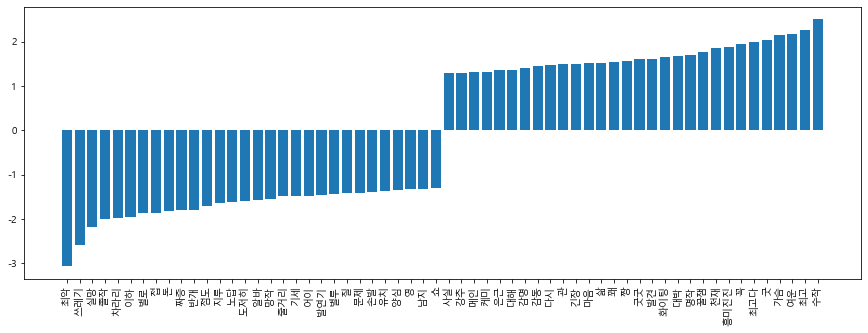

In [46]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15,5)) # 가로,세로 비율
plt.bar(top30_df[0], top30_df['coef']) # x축은 단어, y축은 가중치
plt.xticks(rotation = 90) # x축 눈금 각도 조정
plt.show()

## 파이프라인
- 기능을 연결하는 역할, 데이터 분석 순서에 맞게 기능을 연결

### 토큰화, 수치화, 모델학습

In [47]:
from sklearn.pipeline import make_pipeline

In [48]:
pipe_model = make_pipeline(CountVectorizer(tokenizer=mytoken), LogisticRegression())

In [49]:
pipe_model.fit(X_train,y_train)

C:\Users\smhrd\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(tokenizer=<function mytoken at 0x000001D946C2E3A0>)),
                ('logisticregression', LogisticRegression())])

### 결과 확인

#### score

In [50]:
pipe_model.score(X_train,y_train)

0.882

In [51]:
pipe_model.score(X_test,y_test)

0.727

In [52]:
pipe_model.steps

[('countvectorizer',
  CountVectorizer(tokenizer=<function mytoken at 0x000001D946C2E3A0>)),
 ('logisticregression', LogisticRegression())]

In [53]:
pipe_cv = pipe_model.steps[0][1]

In [54]:
pipe_cv.vocabulary_

{'더빙': 1885,
 '진짜': 8081,
 '목소리': 2971,
 '흠': 10034,
 '포스터': 9259,
 '보고': 3672,
 '초딩': 8385,
 '영화': 5945,
 '줄': 7878,
 '오버': 6039,
 '연기': 5866,
 '무재': 3078,
 '밓었': 3285,
 '다그': 1644,
 '래서': 2311,
 '추천': 8490,
 '교도소': 725,
 '이야기': 6761,
 '구먼': 761,
 '재미': 7255,
 '평점': 9232,
 '조정': 7694,
 '몬페': 2985,
 '의': 6607,
 '스파이더맨': 4930,
 '커스틴': 8635,
 '던스트': 1901,
 '막': 2652,
 '걸음': 341,
 '마': 2569,
 '세': 4542,
 '초등학교': 8383,
 '학년': 9463,
 '생인': 4369,
 '반개': 3384,
 '움': 6340,
 '원작': 6377,
 '긴장감': 1072,
 '제대로': 7598,
 '별': 3646,
 '욕': 6241,
 '이응경': 6794,
 '길용우': 1077,
 '생활': 4375,
 '년': 1481,
 '정말': 7505,
 '발': 3411,
 '해도': 9578,
 '그것': 877,
 '납치': 1413,
 '감금': 127,
 '반복': 3393,
 '드라마': 2105,
 '가족': 70,
 '사람': 4146,
 '네': 1464,
 '액션': 5504,
 '몇': 2910,
 '왜케': 6189,
 '꽤': 1241,
 '볼': 3754,
 '데': 1908,
 '헐리우드': 9672,
 '인피니트': 6949,
 '짱': 8161,
 '볼때': 3760,
 '향수': 9643,
 '자극': 7068,
 '허진호': 9663,
 '감성': 140,
 '절제': 7455,
 '멜로': 2871,
 '달인': 1751,
 '울면': 6332,
 '손': 4675,
 '횡단보도': 9947,
 '때': 2198,
 '

In [55]:
pipe_lr = pipe_model.steps[1][1]

In [56]:
pipe_lr.coef_

array([[ 2.85013101e-01, -2.57599092e-04,  3.07913738e-01, ...,
         2.10010784e-01,  7.17628223e-02,  1.99440186e-01]])

### GridSearch

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {
    'countvectorizer__max_df' : [100,200,300],
    'countvectorizer__min_df' : [10,20,30],
    'countvectorizer__ngram_range' : [(1,1),(1,2),(1,3)],
    'logisticregression__C' : [0.01,0.1,1,10,100]
}

In [59]:
grid = GridSearchCV(pipe_model,param_grid,cv=5)

In [ ]:
grid.fit(X_train,y_train)

C:\Users\smhrd\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

C:\Users\smhrd\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [ ]:
grid.best_params_

In [ ]:
grid.best_score